# Download and Unzip Dataset 

In [ ]:
!pip install pafy youtube-dl moviepy

In [1]:
pip install moviepy



     -------------------------------------- 388.3/388.3 KB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 313.5/313.5 KB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 22.6/22.6 MB 4.0 MB/s eta 0:00:00
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110765 sha256=31dfa097ea9537842981feb7e618d4d302641cf0e26bfa9d69fab01201a82a95
  Stored in directory: c:\users\mill\appdata\local\pip\cache\wheels\96\32\2d\e10123bd88fbfc02fed53cc18c80a171d3c87479ed845fa7c1
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\mill\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install opencv-python


You should consider upgrading via the 'c:\Users\mill\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
pip install numpy


You should consider upgrading via the 'c:\Users\mill\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install tensorflow



     ---------------------------------------- 376.9/376.9 MB ? eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 14.5 MB/s eta 0:00:00
     -------------------------------------- 127.8/127.8 KB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 1.5 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 10.5 MB/s eta 0:00:00
     --------------------------------------- 26.4/26.4 MB 12.1 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 KB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 65.8

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\mill\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install --upgrade h5py


In [4]:
pip install opencv-python torch torchvision numpy


You should consider upgrading via the 'c:\Users\mill\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


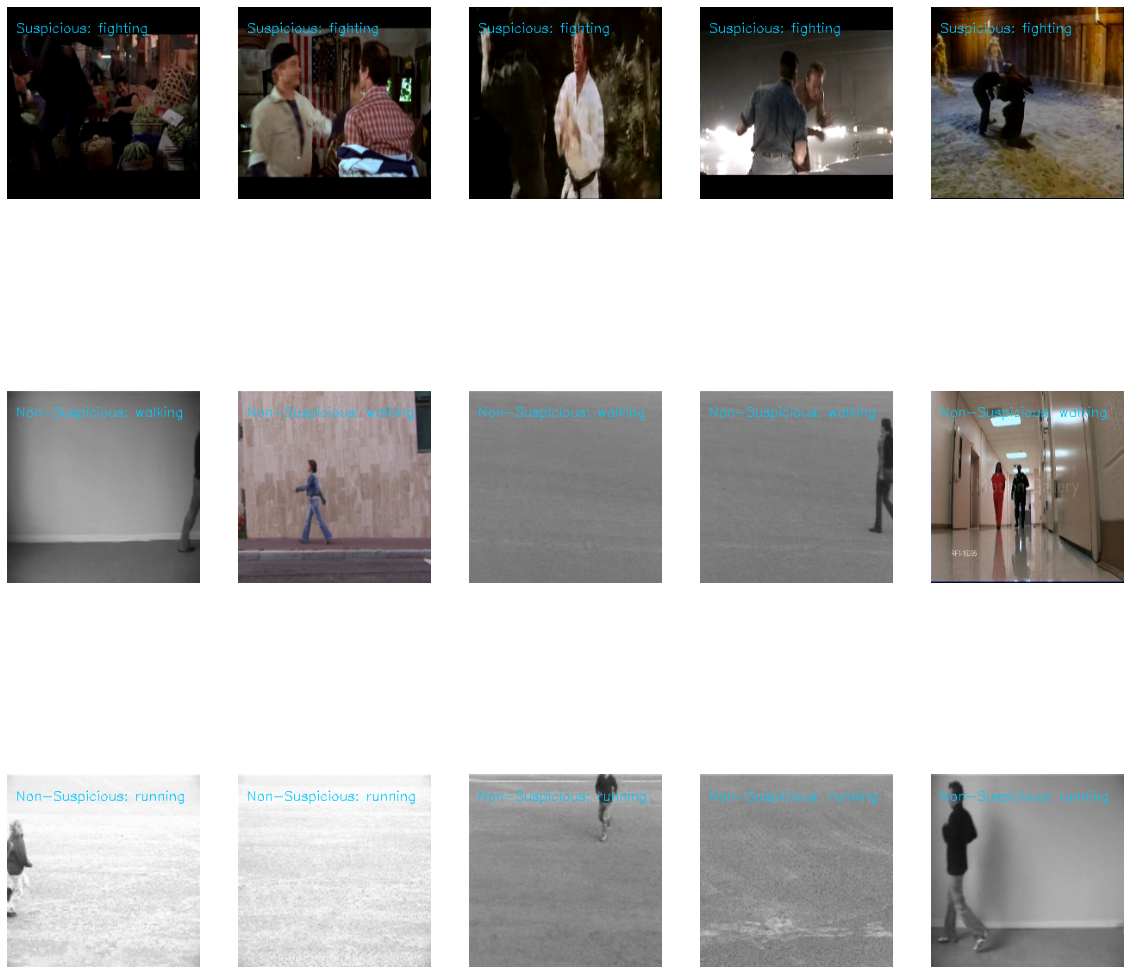

In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Update the path to your organized dataset directory
organized_dataset_directory = 'Organized_Dataset'

# Class lists for Suspicious and Non-Suspicious categories
suspicious_classes = ['fighting']
non_suspicious_classes = ['walking', 'running']

num_frames_per_class = 5

# View the organized dataset
plt.figure(figsize=(20, 20))

# List all class directories in the new structure
all_classes_paths = [
    os.path.join(organized_dataset_directory, 'Suspicious', class_name) for class_name in suspicious_classes
] + [
    os.path.join(organized_dataset_directory, 'Non-Suspicious', class_name) for class_name in non_suspicious_classes
]

counter = 1
for class_path in all_classes_paths:
    class_name = os.path.basename(class_path)
    if not os.path.exists(class_path):
        print(f"Directory does not exist: {class_path}")
        continue
    
    video_files_names_list = os.listdir(class_path)
    
    if not video_files_names_list:
        print(f"No video files found in directory: {class_path}")
        continue  # Skip if no video files in the class directory
    
    for _ in range(num_frames_per_class):
        # Select a random video file from the current class
        selected_video_file_name = random.choice(video_files_names_list)
        video_path = os.path.join(class_path, selected_video_file_name)
        
        # Read a frame from the selected video
        video_reader = cv2.VideoCapture(video_path)
        if not video_reader.isOpened():
            print(f"Failed to open video file: {video_path}")
            continue
        
        frame_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
        if frame_count <= 0:
            print(f"Video file has no frames: {video_path}")
            video_reader.release()
            continue
        
        random_frame_number = random.randint(0, frame_count - 1)
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, random_frame_number)  # Set to read a random frame
        success, bgr_frame = video_reader.read()
        video_reader.release()
        
        if not success:
            print(f"Failed to read frame from video: {video_path}")
            continue  # Skip if unable to read the frame
        
        # Resize and convert frame to RGB
        bgr_frame = cv2.resize(bgr_frame, (224, 224))
        rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
        
        # Put class name text on the frame
        category = 'Suspicious' if class_name in suspicious_classes else 'Non-Suspicious'
        label = f'{category}: {class_name}'
        cv2.putText(rgb_frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 200, 255), 1)
        
        # Display the frame
        plt.subplot(len(all_classes_paths), num_frames_per_class, counter)
        plt.imshow(rgb_frame)
        plt.axis('off')
        counter += 1

plt.show()


In [27]:
!git clone https://github.com/ultralytics/yolov5.git


Cloning into 'yolov5'...


In [34]:
cd yolov5


c:\Users\mill\Capstone project\yolov5


In [28]:
pip install -r yolov5/requirements.txt


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mill\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~il\\_imaging.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\mill\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 207.3/207.3 KB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 145.3/145.3 KB 4.4 MB/s eta 0:00:00
     -------------------------------------- 63.9/63.9 KB 570.9 kB/s eta 0:00:00
     -------------------------------------- 777.9/777.9 KB 2.9 MB/s eta 0:00:00
     -------------------------------------- 863.4/863.4 KB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 KB 1.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.1.0
    Uninstalling setuptools-58.1.0:
      Successfully uninstalled setuptools-58.1.0
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:

In [29]:
pip install torch torchvision torchaudio --upgrade



     ---------------------------------------- 159.8/159.8 MB ? eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 13.7 MB/s eta 0:00:00
     ---------------------------------------- 228.5/228.5 MB ? eta 0:00:00
     -------------------------------------- 286.4/286.4 KB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.0
    Uninstalling torch-2.2.0:
      Successfully uninstalled torch-2.2.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.17.0
    Uninstalling torchvision-0.17.0:
      Successfully uninstalled torchvision-0.17.0


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\mill\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [31]:
import torch

In [ ]:
pip install ultralytics


In [35]:
# Load YOLOv5 model
import torch
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt')

# Function to get frames from a video
def get_frames(video_path, num_frames=5):
    video_reader = cv2.VideoCapture(video_path)
    frame_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []
    for _ in range(num_frames):
        random_frame_number = random.randint(0, frame_count - 1)
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, random_frame_number)
        success, frame = video_reader.read()
        if success:
            frames.append(frame)
    video_reader.release()
    return frames

# Function to plot predictions
def plot_predictions(frames, results):
    plt.figure(figsize=(20, 20))
    for i, (frame, result) in enumerate(zip(frames, results)):
        for *box, conf, cls in result:
            label = model.names[int(cls)]
            cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
            cv2.putText(frame, label, (int(box[0]), int(box[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        plt.subplot(1, len(frames), i + 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

# Process videos
video_paths = list(Path('Organized_Dataset').rglob('*.avi'))
for video_path in video_paths:
    frames = get_frames(str(video_path))
    results = [model(frame).xyxy[0].cpu().numpy() for frame in frames]
    plot_predictions(frames, results)


c:\Users\mill\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mill/.cache\torch\hub\master.zip


ModuleNotFoundError: No module named 'ultralytics'

In [36]:
# Function to classify video frames
def classify_frame(frame, model, threshold=0.5):
    results = model(frame)
    labels, cords = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]

    n = len(labels)
    x_shape, y_shape = frame.shape[1], frame.shape[0]
    for i in range(n):
        row = cords[i]
        if row[4] >= threshold:
            x1, y1, x2, y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape)
            bgr = (0, 255, 0) if labels[i] in [0, 2] else (0, 0, 255)  # 0=person (walking, running), 2=fighting
            cv2.rectangle(frame, (x1, y1), (x2, y2), bgr, 2)
            cv2.putText(frame, str(labels[i]), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, bgr, 2)

    return frame



In [38]:
import models

In [39]:
# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame = classify_frame(frame, model)
    cv2.imshow('YOLOv5 Real-time Classification', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

NameError: name 'model' is not defined